# Hands-on 02: Visualização de sinais na frequência (gerando e vendo o espectro de um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Visualização do conteúdo em frequência (_single_ e _double sided_) de um sinal;
- Descrever o projeto da UNIDADE I: Manipular sinais gravados em arquivos e estimar suas componentes de frequência e fase.

#### Observação:
Antes de executar os códigos a segiur, comente (#) a última linha, a qual deve ficar como a seguir:

> ipython
> #%whos

Esta não é uma função do Python, e sim um comando específico do IPython. Desse modo, só funciona nos notebooks ou no Console IPython embutido no Spyder. Comandos desse tipo são conhecidos como _magic functions_, e acrescentam funcionalidades interessantes aos códigos Python. Para saber mais sobre as _magics_, acesse  a [documentação](https://ipython.org/ipython-doc/3/interactive/tutorial.html). 

# Prática 2: Amplitude do espectro _single sided band_ 

Vamos praticar a construção da magnitude do espectro de um sinal senoidal de frequência única (um tom) sem usar as funções prontas do Python. Usaremos a função **plt.stem($\cdot$)** ao invés da função **plt.plot($\cdot$)**, isso facilitará a visualização no eixo da frequência.

**Passo 1:** Abra o Spyder e digite no _Console IPython_ os seguinte comandos:

> ```python
import numpy.fft as fft  #importa o pacote 'fft' da biblioteca 'numpy'
edit fft                  
edit fft.fft
```

Isso abrirá os arquivos (na ordem):
- $__init__$.py : Arquivos com esse título servem para marcar um diretório no disco como um diretório de pacote do Python. Lembre que o interpretador irá procurar nos diretórios do disco pelo pacote que está sendo chamado, e diretórios com nomes especiais (numpy,matplotlib,etc...) poderiam ser confundidos com os diretórios próprios dessas bibliotecas. Para evitar esse problema, diretórios de pacote contém o script marcador $__init__$.py, que pode estar vazio, inclusive. 

- np.fft.py (ou fftpack.py): Script contendo a definição das funções em comentários, bem como os seus respectivos códigos-fonte. O entendimento das definições pode ser um pouco sutil, dado que essas não são sempre intuitivas. 

Em Python, não existe 'código escondido'. Diz-se que uma função é _Built-in_ quando esta pode ser chamada sem importar uma biblioteca específica.

**Passo 2:** Antes de usar a função do Python, vamos implementar um algoritmo para a DFT utilizando sua definição. Abra um script no Spyder, salve-o como **handson3_2.py** e escreva o seguinte código (remova a linha %whos):

Tempo da DFT =  1.6963600000000003 s


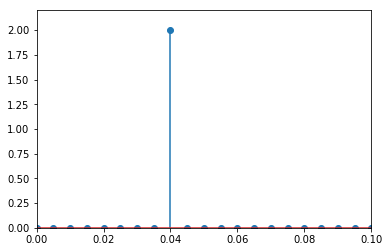

Variable    Type          Data/Info
-----------------------------------
Am          int           2
L           int           2000
N           int           2000
T           float         0.1
WN          complex128    (0.999995065202-0.00314158748588j)
WNnk        ndarray       2000x2000: 4000000 elems, type `complex128`, 64000000 bytes (61.03515625 Mb)
X           ndarray       2000: 2000 elems, type `complex128`, 32000 bytes
f           ndarray       1001: 1001 elems, type `float64`, 8008 bytes
fm          float         0.04
freq1       ndarray       256: 256 elems, type `float64`, 2048 bytes
fsampling   int           10
k           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
lfft        int           512
m           ndarray       2000: 2000 elems, type `float64`, 16000 bytes
n           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
nn          ndarray       2000x2000: 4000000 elems, type `int64`, 32000000 bytes (30.517578125 Mb)
np          module        <m

In [7]:
import warnings                                      # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')                    # Método para suprimir os avisos de exceções

import numpy as np
import matplotlib.pyplot as plt
import time
## Geração do sinal cosenoidal
fsampling = 10                                       # Taxa de amostragem
T =1/fsampling                                       # Tempo entre amostras
L = 2000                                             # Número de amostras
t = np.arange(0,(L-1)*T+1/fsampling,1/fsampling)     # Eixo do tempo
fm = 0.04                                            # Frequência da senoide
Am = 2                                               # Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                          # Sinal senoidal
t1=time.clock()                                      # Contador de tempo

## Montando a DFT
N=len(m)                                             # Comprimento do sinal m(t)
n=np.arange(0,N)                                     # Vetor n
k=np.arange(0,N)                                     # Vetor k
WN=np.exp(-1j*2*np.pi/N)                             # Cálculo de Wn = e^{-j2pi/N}
nn=np.outer(n,k)                                     # Monta a Matriz DFT
WNnk=WN**nn                                          # Monta a Matriz DFT
X=np.inner(m,WNnk.T/L)                               # Implementa o somatório da DFT via operação matricial    
f = fsampling/2*np.linspace(0,1,(L/2)+1)             # Monta o eixo das frequências
tempo_DFT=time.clock() - t1                          # Conta tempo de execução até esse ponto do código
print('Tempo da DFT = ',tempo_DFT,'s')               # Mostra tempo de execução
plt.stem(f,2*np.abs(X[0:L//2+1]))                     # Mostra gráfico do espectro 
plt.axis([0,0.1,0,2.2])                              # Zoom para melhor visualização 
plt.show()
# A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
# identificando suas principais caracteristicas.
%whos



### Sobre o código:

#### Ignorando avisos
Devemos prestar atenção nas exceções mostradas ao exectuar um programa em Python. É semelhante a um 'erro', mas não compromete a execução do programa. Para saber mais sobre o levantamento de exceções e como elas funcionam, veja a [documentação](http://turing.com.br/pydoc/2.7/tutorial/errors.html). Não há necessidade, no escopo da disciplina, de deixar esses avisos serem sempre exibidos nos notebooks, por isso usamos as linhas abaixo para ignorá-los:

> ```python
import warnings                 # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore') 
```

#### Potências

Elevar uma base 'a' a um expoente 'b' é bem simples em Python: basta usar o operador $**$ . Não é necessário utilizar as bibliotecas _math_ ou _numpy_. Na linha abaixo,

>```python
WNnk=WN**nn                     # Monta a Matriz DFT
```

o escalar 'WN' foi elevado a uma matriz de expoentes 'nn', e o resultado dessa operação foi outra matriz, com as mesmas dimensões de nn, cujos elementos correspondiam ao resultado de WN elevado ao elemento de mesma posição em nn.

#### Biblioteca time

Permite uma série de funcionalidades relacionadas a medição de tempo, como contadores e até tempos de espera na execução. Veja mais na [documentação](https://docs.python.org/2/library/time.html). O comando _time_ comando faz uma medição de tempo, acessando um valor de tempo definido pelo contador do sistema. Veja que ele é usado mais uma vez no fim do código para colher outra amostra de tempo e subtrair t1, para conseguir um valor de intervalo de tempo:

>```python
import time
t1=time.clock()                 # Contador de tempo
```


>```python
tempo_DFT=time.clock() - t1     # Conta tempo de execução até esse ponto do código
```

**Passo 3:** Entenda o funcionamento das funções np.outer(), np.inner() e np.linspace() através do Spyder. Para isso:
- Observe as variáveis geradas por essas funções no _variable explorer_, no canto superior direito da tela;
- Use o console do IPython para acessar a definição da função (ver Passo 4 da Prática 1, Hands-on 02 Python);
- Explore o código fonte (ver Passo 1 da prática atual).

# Prática 3: Amplitude do espectro usando as funções do Python

Agora vamos usar as funções prontas do Python (biblioteca NumPy) para gerar o espectro de um sinal. Seguiremos os seguintes passos:
- Definir o tamanho da FFT (resolução em frequência);
- Definir a frequência de amostragem (seguindo a montagem do sinal no tempo);
- Normalizar a amplitude;
- Definir o eixo da frequência de acordo com o comprimento da FFT e a taxa de amostragem.

A resolução mínima de frequência será determinada pelo número de pontos da FFT e a taxa de amostragem. 


**Passo 1:** Abra um script no Spyder, salve-o como **handson3_3.py** e escreva o seguinte código:

Tempo da FFT =  0.48734199999999994


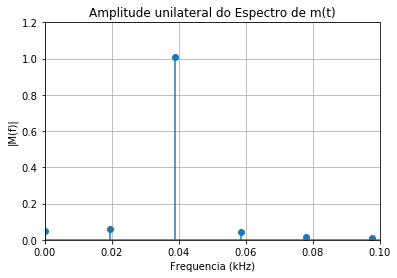

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
#Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal
t1=time.clock()                                              #Contador de tempo

#Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 512                                                   #Tamanho da FFT  
#Construção do single-sided amplitude spectrum.
yfft = np.fft.fft(m,lfft)/lfft                               #Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              #Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    #Coleta da FFT unilateral
plt.stem(freq1,abs(yfftuni))                                 #Plotagem do espectro unilateral M(f)
tempo_FFT=time.clock() - t1                                  #Conta tempo de execução até esse ponto do código
print('Tempo da FFT = ',tempo_FFT)                           #Mostra de tempo de execução
plt.title('Amplitude unilateral do Espectro de m(t)')        #Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               #Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         #Configuração do eixo y do gráfico  
plt.grid()                                                   #Adiona o grid  
plt.axis([0,0.1,0,1.2])                                      #Zoom do gráfico
plt.show()

Pelo gráfico, vemos que o pico não está centrado em 0,04 kHz. Podemos ver que quando a curva se aproxima de 0,04 kHz a amplitude cresce e em seguida decresce. Isso é muito comum de acontecer, e deve ao fato de que o eixo da frequência não está definido o valor de 0.04. Vamos inspecionar a variável _freq1_, os pontos mais pŕoximos de 0,04 são 0.0391 kHz e 0.0586 kHz, por isso o gráfico está aparentemente deslocado. Caso estivesse definido em 0.04, haveria o pico máximo. 

**Passo 2:** Vamos inspecionar as variável _freq1_, digite _freq1_ no Console IPython do Spyder:

In [6]:
# Seis primeiros termos do vetor freq1 mostram que ele não está definido em 0.04 kHz.
freq1[0:5]

array([ 0.        ,  0.01953125,  0.0390625 ,  0.05859375,  0.078125  ])

O motivo de usar a função **plt.stem($\cdot$)** no lugar de **plt.plot($\cdot$)** é que esta última faz a ligação dos pontos subsequentes e os aproxima como retas, o que pode mascarar o real comportamento do espectro. 


**Passo 3:** Vamos verificar a influência do tamanho da FFT no espectro mostrado. Abra um script no Spyder, salve-o como **handson3_4.py** e escreva o seguinte código. O código ilustra os dois casos: (i) Quando o tamanho da FFT gera um eixo que inclui a frequência da senoide; e (ii) Quando o tamanho da FFT **não** gera um eixo que inclui a frequência da senoide.

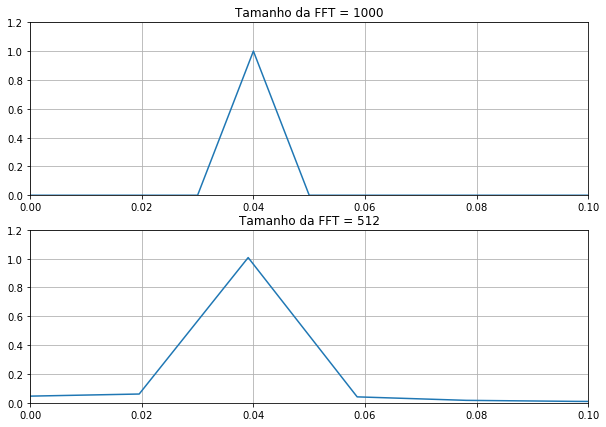

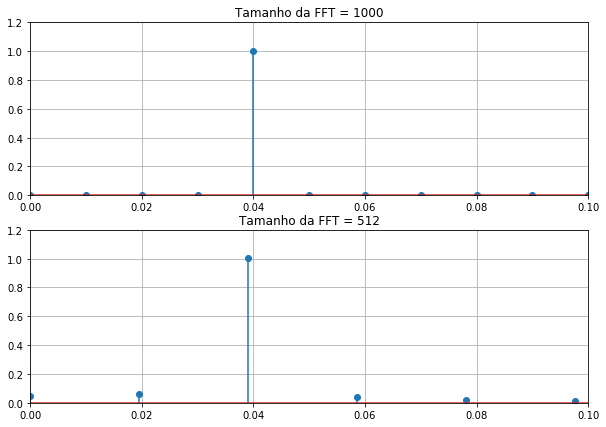

In [3]:
import numpy as np
import matplotlib.pyplot as plt
## Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal

## Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
plt.figure(1,[10,7])                                         #instância de figure, de número 1 e tamanho 10x7

lfft = 1000                                                  # Tamanho da FFT
yfft = np.fft.fft(m,lfft)/lfft                               # Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              # Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    # Coleta da FFT unilateral


## Visualizando a amplitude do espectro com um tamanho arbitrário para a FFT
lfft2 = 512                                                  # Tamanho da FFT
yfft2 = np.fft.fft(m,lfft2)/lfft2                            # Cálculo da FFT via função do Matlab
freq2 = np.arange(0,fsampling/2,fsampling/lfft2)             # Definição do eixo das frequências unilateral
yfftuni2 = yfft2[0:lfft2//2]                                 # Coleta da FFT unilateral


## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(freq1,np.abs(yfftuni))                              # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft))
plt.axis([0,0.1,0,1.2])

plt.subplot(212)
plt.plot(freq2,np.abs(yfftuni2))                             # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft2))
plt.axis([0,0.1,0,1.2])

plt.show()

#Gráficos com a função pĺt.stem()
plt.figure(2,[10,7])
plt.subplot(211)
plt.stem(freq1,np.abs(yfftuni))                              # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft))
plt.axis([0,0.1,0,1.2])

plt.subplot(212)
plt.stem(freq2,np.abs(yfftuni2))                             # Plotagem do espectro unilateral M(f)
plt.grid()
plt.title('Tamanho da FFT = '+str(lfft2))
plt.axis([0,0.1,0,1.2])

plt.show() 



Note que conseguimos visualizar melhor o desvio da frequência central quando usamos a função **plt.stem($\cdot$)**.

# Prática 4: _Double-sided amplitude spectrum_

Queremos mostrar agora os dois lados (positivo e negativo) do espectro frequência. Para isso definiremos alguns vetores de forma diferente que as práticas anteriores.

**Passo 1:** Abra um script no Matlab, salve-o como **handson3_5.py** e escreva o seguinte código:

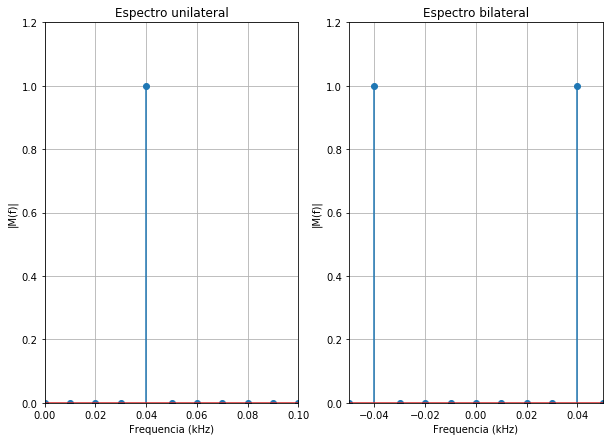

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Geração do sinal cosenoidal
fsampling = 10                                               #Taxa de amostragem
tf = 200                                                     #Tempo entre amostras
t =  np.arange(0,tf+1/fsampling,1/fsampling)                 #Eixo do tempo
fm = 0.04                                                    #Frequência da senoide
Am = 2                                                       #Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                                  #Sinal senoidal

## Plot do sinal M(f): single-sided amplitude spectrum.
# Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 1000
## Construção do single-sided amplitude spectrum.
yfft = np.fft.fft(m,lfft)/lfft                               # Cálculo da FFT via função do Matlab
freq1 = np.arange(0,fsampling/2,fsampling/lfft)              # Definição do eixo das frequências unilateral
yfftuni = yfft[0:lfft//2]                                    # Coleta da FFT unilateral

plt.figure(1,[10,7])
plt.subplot(121)
plt.stem(freq1,np.abs(yfftuni))                              # Plotagem do espectro unilateral M(f)
plt.title('Espectro unilateral')                             # Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([0,0.1,0,1.2])                                      # Zoom do gráfico

## Plot do sinal M(f): double-sided amplitude spectrum.
# Colocando as frequência no lado esquerdo 
plt.subplot(122)
## Construção do double-sided amplitude spectrum.
lfftd = 1000
yfftd = np.fft.fft(m,lfftd)/lfftd                            # Cálculo da FFT via função do Matlab
yfftd = np.fft.fftshift(yfft)
# Definição do eixo das frequências unilateral
freqd = np.fft.fftfreq(lfftd,1/fsampling)
freqd = np.fft.fftshift(np.fft.fftfreq(lfftd,1/fsampling))
plt.stem(freqd,np.abs(yfftd))                                # Plotagem do espectro unilateral M(f)
plt.title('Espectro bilateral')                              # Configuração do título do gráfico 
plt.xlabel('Frequencia (kHz)')                               # Configuração do eixo x do gráfico 
plt.ylabel('|M(f)|')                                         # Configuração do eixo y do gráfico  
plt.grid()                                                   # Adiona o grid  
plt.axis([-0.05,0.05,0,1.2])                                 # Zoom do gráfico

plt.show()

**Passo 2:** Para entender o que foi feito nas linha de código abaixo:
```python
freqd = np.fft.fftfreq(lfftd,1/fsampling)
freqd = np.fft.fftshift(np.fft.fftfreq(lfftd,1/fsampling))
```
Consulte, com a ajuda do **Console IPython**, a definição dessas duas funções. Lembre que as células de código (quando o kernel em questão é do próprio Python) do Jupyter Notebook também se comportam como o console IPython, então essa consulta pode ser feita pelo Spyder ou pelo próprio notebook. Sabendo disso, execute as células abaixo:

In [28]:
import numpy as np #apenas se a numpy não tiver sido importada anteriormente
np.fft.fftfreq?

Você pode expandir a definição clicando no canto superior direito da aba que surge, ao lado do 'x'.

In [30]:
np.fft.fftshift?

# Projeto da UNIDADE I


Agora que você já sabe gerar e visualizar um sinal no tempo e na frequência, o projeto da UNIDADE I traz o desafio de você descobrir tanto a frequência como a fase de um sinal gravado em arquivo.


O arquivo de cada aluno está identificado por sua matrícula na pasta [./CODES/HD_02_files](./CODES/HD_02_files). Por exemplo, o arquivo **2014089577.mat** é do aluno com matrícula 2014089577.


Cada arquivo (gerado no Matlab) tem os seguinte conjunto de dados:

- **fs**: frequência de amostragem (taxa de amostragem)
- **t_sample**: vetor com os instantes das amostras do sinal 
- **x**: amostras dos sinal

O sinal $x$ é composto por uma soma de 2 a 5 senos com frequências e fases diferentes. Seu objetivo é, por meio do sinal $x$, estimar quantos senos compõem o sinal, quais suas frequências e respectivas fases.

Um material muito bom para guia-lo na execução do projeto é: 

[Profs. Larissa Driemeier/Marcilio Alves/Rafael T. Moura, ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO, Departamento de Engenharia Mecatrônica, Instrumentação](./MATERIAL/HD_03_MATLAB/AnaliseSinais_Instrumentacao.pdf)
[Link para versão na web](https://edisciplinas.usp.br/pluginfile.php/4398247/mod_resource/content/4/AnaliseSinais_Instrumentacao.pdf)

Minha sugestão é:

1. Leia o material, siga os experimentos (pelo menos até a página 9). O sinal foi gerado minimizando o Leakage;
2. Abra o arquivo com sua matrícula, manipule o sinal $x$ e estime as frequências e, fases correspondentes, que o compõe. **Dica**: você pode utilizar a função **findpeaks** no espectro do sinal!!!


Além de enviar o código pelo SIGAA, a entrega só será completa se você gravar um vídeo de até 5 minutos explicando seu código e mostrando os valores estimados. 

O link para o vídeo deve ser compartilhado no youtube (de forma privada) para o prof. Vicente Sousa pelo e-mail **vicente.sousa@ufrn.edu.br**.

# Bibliografia

Steven W. Smith, The Scientist and Engineer's Guide to Digital Signal Processing (http://www.dspguide.com/ch8/1.htm ).

Steve Mann, The Discrete Fourier Transform (http://wearcam.org/ece431/course_material/fourierop_and_dit.htm ).

Wikipedia: DFT matrix (https://en.wikipedia.org/wiki/DFT_matrix)

OKTAY ALKIN, SIGNALS and SYSTEMS - A MATLAB Integrated Approach, 2014.

MATTHEW N. O. SADIKU and WARSAME H. ALI, Signals and Systems A Primer with MATLAB, 2015.

Ricardo Tokio Higuti, Processamento Digital de Sinais - Notas de Aula - Analise Espectral Usando a DFT (http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/ele1095_5_analiseespectral.pdf)

Digital Signal Processing - Part 3: Discrete-Time Signals & Systems Case Studies (http://aparate.elth.ucv.ro/web/Arhiva/Matla/matlabsignal.pdf)


